## This Notebook is to Post-process Sampled Data

1. make sure that this notebook is in the same folder with the data files (with extension .npz)
2. run the notebook from the beginning, all the plots will be re-drawn

In [9]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [10]:
import numpy as np
import scipy.integrate
import scipy.optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker

# activating the command below will cause matplotlib to use 'TEX' to interpret every text
#, but choices of font styles in TEX are limited, so avoid using 'TEX' but rather us
# matploblib's own font/styles, etc.
# plt.rc('text', usetex=True)    
# plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{textcomp}')

%matplotlib inline

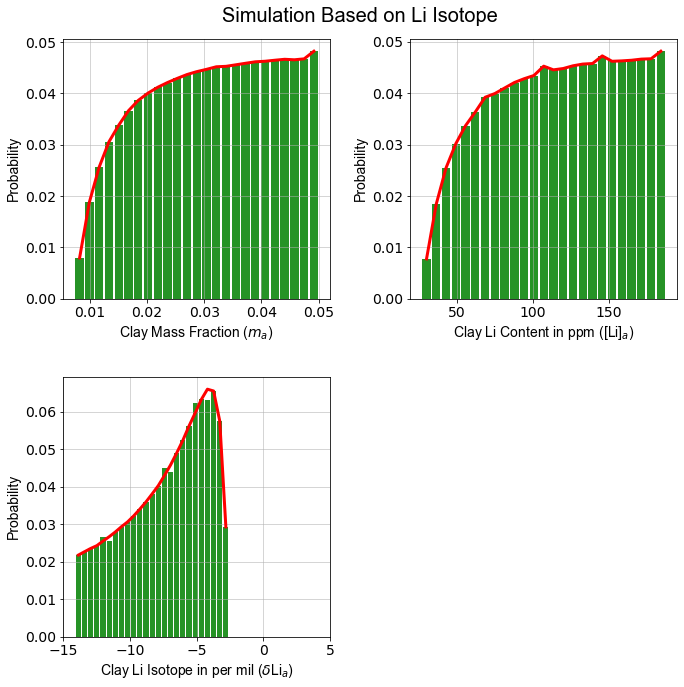

In [11]:
# Plot the distribution of matched values
FONT_SIZE = 14
bin_num   = 25
lw        = 3
afont = {'fontname':'Arial'}

with np.load('./Li_const.npz') as data:

    m_lia   = data['m_lia']
    m_dlia  = data['m_dlia']
    m_m     = data['m_m']
        
    hist_lia, edge_lia    = np.histogram(m_lia, density=True, bins=bin_num)
    hist_dlia, edge_dlia  = np.histogram(m_dlia, density=True, bins=bin_num)
    hist_m, edge_m        = np.histogram(1-m_m, density=True, bins=bin_num)
    
    hist_lia  = hist_lia*np.diff(edge_lia)
    hist_m    = hist_m*np.diff(edge_m)
    hist_dlia = hist_dlia*np.diff(edge_dlia)

    f = plt.figure(figsize=(11,11))   # results after matching dlia_t = -0.0007
    plt.suptitle('Simulation Based on Li Isotope', size=20, y=0.92, **afont)

    weights = np.ones_like(m_m) / len(m_m)
    plt.subplot(2,2,1)
    plt.hist(1-m_m, weights=weights, bins=bin_num, rwidth=0.85, facecolor='g', alpha=0.85)  # density=False would make counts
    plt.plot(0.5*(edge_m[:-1]+edge_m[1:]), hist_m, color='r', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Mass Fraction ($m_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_lia) / len(m_lia)
    plt.subplot(2,2,2)
    plt.hist(m_lia*1e6, weights=weights, bins=bin_num, rwidth=0.85, facecolor='g', alpha=0.85)
    plt.plot(0.5*(edge_lia[:-1]+edge_lia[1:])*1e6, hist_lia, color='r', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Li Content in ppm ([Li]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_dlia) / len(m_dlia)
    plt.subplot(2,2,3)
    plt.hist(m_dlia*1e3, weights=weights, bins=bin_num, rwidth=0.85, facecolor='g', alpha=0.85)
    plt.plot(0.5*(edge_dlia[:-1]+edge_dlia[1:])*1e3, hist_dlia, color='r', linewidth=lw)
    plt.xlim([-15, 5])
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Li Isotope in per mil ($\delta$Li$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.grid(which='major', alpha=0.65)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

## note for the above plot

1. it is based on matching the measured $\delta$Li$_a$ data
2. total sample size (matched + unmatched) is 1000$^3$
3. integration of the probability across each variable's range will yield a total probabily of 1.
4. given that our approach is a simplied version of Bayesian analysis with prior distributions of all variables ($m_a$, [Li]$_a$, and $\delta$Li$_a$) being uniform across their respective allowed ranges, the plot above corresponds to posterior probability distribution of each variable.
5. according to these posteriors, the maximum aposteriori probability (MAP) for $m_a$ is $\approx$ 0.05, MAP for [Li]$_a$ is $\approx$ 180 ppm, and MAP for $\delta$Li$_a$ is $\approx-$ 4 $^0\!\!/\!_{00}$.

## I'll use the same terminology (e.g., MAP) in the succeeding analysis


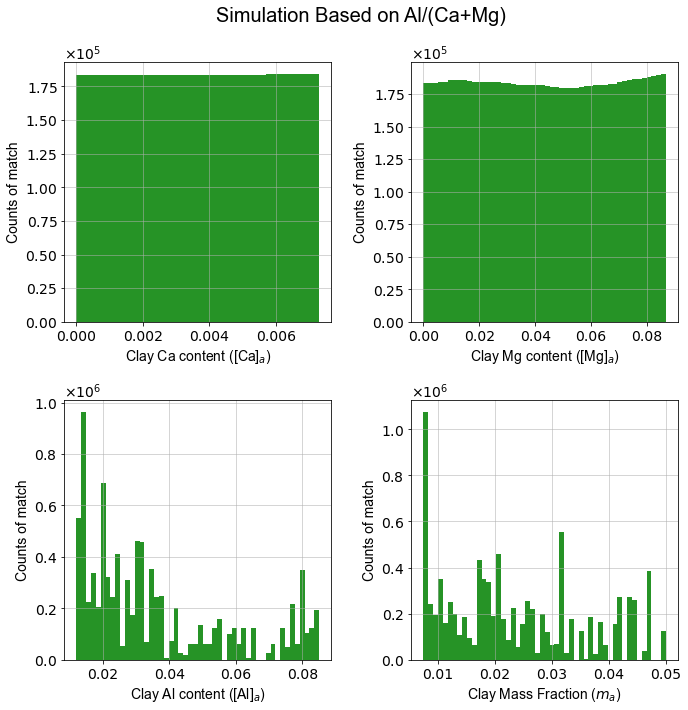

In [12]:
# Plot the distribution of matched values
FONT_SIZE = 14
bin_num   = 50
lw        = 3
afont = {'fontname':'Arial'}

# formatter for yaxis tick labels
fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((-2, 2))
fmt.set_scientific(True)

with np.load('./Ele_const.npz') as data:
    
    m_caa = data['m_caa']
    m_mga = data['m_mga']
    m_ala = data['m_ala']
    m_m2  = data['m_m2']
    
    # Plot the distribution of matched values
    f = plt.figure(figsize=(11,11))   # results after matching elemental ratio
    plt.suptitle('Simulation Based on Al/(Ca+Mg)', size=20, y=0.95, **afont)

    plt.subplot(2,2,1)
    plt.hist(m_caa, bins=bin_num, facecolor='g', alpha=0.85) 
    plt.ylabel('Counts of match', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Ca content ([Ca]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.grid(which='major', alpha=0.65)

    plt.subplot(2,2,2)
    plt.hist(m_mga, bins=bin_num, facecolor='g', alpha=0.85) 
    plt.ylabel('Counts of match', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Mg content ([Mg]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.grid(which='major', alpha=0.65)

    plt.subplot(2,2,3)
    plt.hist(m_ala, bins=bin_num, facecolor='g', alpha=0.85) 
    plt.ylabel('Counts of match', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Al content ([Al]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.grid(which='major', alpha=0.65)

    plt.subplot(2,2,4)
    plt.hist(1-m_m2, bins=bin_num, facecolor='g', alpha=0.85)  # density=False would make counts
    plt.ylabel('Counts of match', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Mass Fraction ($m_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.grid(which='major', alpha=0.65)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
    
#     f.savefig('./count_stat.png', dpi=300)

## The above plot shows the matched counts among all the data points sampled in a Monte Carlo way

1. the total sample size (matched + unmatched) is $250^4 \approx 3.9\times10^9$
2. only the matched counts are plotted
3. Below I plot the corresponding posterior density distribution

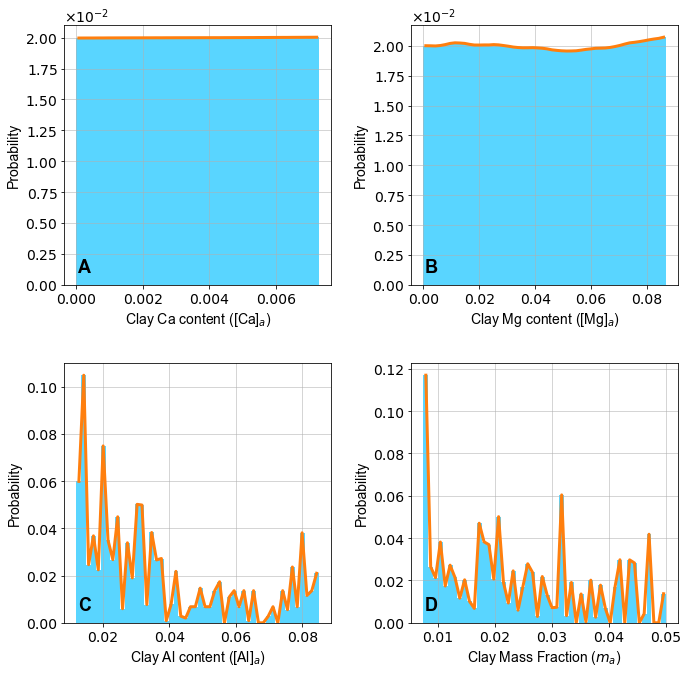

In [13]:
with np.load('./Ele_const.npz') as data:
    
    m_caa = data['m_caa']
    m_mga = data['m_mga']
    m_ala = data['m_ala']
    m_m2  = data['m_m2']
    
    hist_caa, edge_caa    = np.histogram(m_caa, density=True, bins=bin_num)
    hist_mga, edge_mga    = np.histogram(m_mga, density=True, bins=bin_num)
    hist_ala, edge_ala    = np.histogram(m_ala, density=True, bins=bin_num)
    hist_m, edge_m        = np.histogram(1-m_m2, density=True, bins=bin_num)
    
    hist_caa  = hist_caa*np.diff(edge_caa)
    hist_mga  = hist_mga*np.diff(edge_mga)
    hist_ala  = hist_ala*np.diff(edge_ala)
    hist_m    = hist_m*np.diff(edge_m)

    # Plot the distribution of matched values
    f = plt.figure(figsize=(11,11))   # results after matching elemental ratio
#     plt.suptitle('Simulation Based on Al/(Ca+Mg)', size=20, y=0.95)

    weights = np.ones_like(m_caa) / len(m_caa)
    plt.subplot(2,2,1)
    plt.hist(m_caa, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65) 
    plt.plot(0.5*(edge_caa[:-1]+edge_caa[1:]), hist_caa, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Ca Mass Fraction in Clay ([Ca]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.text(x=0.05, y=0.05, s='A', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_mga) / len(m_mga)
    plt.subplot(2,2,2)
    plt.hist(m_mga, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65) 
    plt.plot(0.5*(edge_mga[:-1]+edge_mga[1:]), hist_mga, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Mg Mass Fraction in Clay ([Mg]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.gca().yaxis.set_major_formatter(fmt)
    plt.gca().yaxis.get_offset_text().set_fontsize(FONT_SIZE)
    plt.text(x=0.05, y=0.05, s='B', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_ala) / len(m_ala)
    plt.subplot(2,2,3)
    plt.hist(m_ala, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65)
    plt.plot(0.5*(edge_ala[:-1]+edge_ala[1:]), hist_ala, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Al Mass Fraction in Clay ([Al]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.text(x=0.05, y=0.05, s='C', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_m2) / len(m_m2)
    plt.subplot(2,2,4)
    plt.hist(1-m_m2, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65)  # density=False would make counts
    plt.plot(0.5*(edge_m[:-1]+edge_m[1:]), hist_m, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Mass Fraction in Carbonate ($m_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.text(x=0.05, y=0.05, s='D', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
    f.savefig('./Figure-S5.png', dpi=300)

## The above plot shows the posterior probability distribution using the Al/(Ca + Mg) constraint

1. red curves are the envelops of probability distributions.
2. obviously this elemental constraint yield MAP for $m_a \approx 0.005$
3. the results are insensitve to Ca and Mg content in clay minerals. This suggests that we can randomly pick [Ca]$_a$ and [Mg]$_a$ values and fix them to refine the Monte Carlo sampling only for [Al]$_a$ and $m_a$. This is done in what follows.


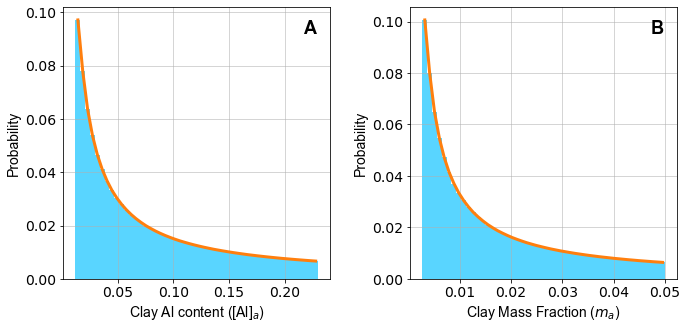

In [14]:
# Plot the distribution of matched values

bin_num = 50
    
with np.load('./Ele_const_2.npz') as data:
    
    m_ala = data['m_ala']
    m_m2  = data['m_m2']
    
    hist_ala, edge_ala = np.histogram(m_ala, density=True, bins=bin_num)
    hist_m, edge_m     = np.histogram(1-m_m2, density=True, bins=bin_num)
    
    hist_ala = hist_ala*np.diff(edge_ala)
    hist_m   = hist_m*np.diff(edge_m)
    
    f = plt.figure(figsize=(11,5))              # results after matching elemental ratio
#     plt.suptitle('Refined Simulation Based on Al/(Ca+Mg)', size=20, y=0.95)
    
    weights = np.ones_like(m_ala) / len(m_ala)
    plt.subplot(1,2,1)
    plt.hist(m_ala, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65) 
    plt.plot(0.5*(edge_ala[:-1]+edge_ala[1:]), hist_ala, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Al Mass Fraction in Clay ([Al]$_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.text(x=0.9, y=0.9, s='A', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)

    weights = np.ones_like(m_m2) / len(m_m2)
    plt.subplot(1,2,2)
    plt.hist(1-m_m2, bins=bin_num, weights=weights, facecolor='deepskyblue', alpha=0.65)  # density=False would make counts
    plt.plot(0.5*(edge_m[:-1]+edge_m[1:]), hist_m, color='tab:orange', linewidth=lw)
    plt.ylabel('Probability', size=FONT_SIZE, **afont)
    plt.xlabel(r'Clay Mass Fraction ($m_a$)', size=FONT_SIZE, **afont);
    plt.tick_params(labelsize=FONT_SIZE)
    plt.text(x=0.9, y=0.9, s='B', transform=plt.gca().transAxes, size=18, weight="bold", **afont)
    plt.grid(which='major', alpha=0.65)
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
    f.savefig('./Figure-S6.png', dpi=300)

## The above plot is the refined Bayesian analysis only for [Al]$_a$ and $m_a$

1. In this refined simulation, I fixed [Ca]$_a = 0.00365$ and [Mg]$_a = 0.0434$; these values are medians of their respective allowed ranges.
2. The total sample (matched + unmatched) size is $50000^2 = 2.5\times10^9$.
3. Note the probality distribution curves are much smoother than earlier owing to the denser sampling in the refined run.
4. MAP for $m_a$ is still $\approx 0.005$, but now we can calculate "credible intervals" in Bayesian statistics, as apposed to "confidence intervals" in frequentist statistics.
5. According to the following, the probability of clay mass fraction $m_a \in [0, \, 0.005]$ is $P(m_a \in [0, \, 0.005]) \approx 0.25$, $P(m_a \in [0, \, 0.01]) \approx 0.46$, $P(m_a \in [0, \, 0.015]) \approx 0.60$. However, note that the probability of high clay mass fractions, e.g., $m_a \in [0.03, \, 0.05]$ is low, that is, $P(m_a \in [0.03, \, 0.05]) \approx 0.17$.

In [15]:
up_lim   = 0.005
idx,     = np.nonzero(edge_m > up_lim)
print(sum(hist_m[:idx[0]]))

0.2455278589767758


In [16]:
up_lim   = 0.01
idx,     = np.nonzero(edge_m > up_lim)
print(sum(hist_m[:idx[0]]))

0.459309182128915


In [17]:
up_lim   = 0.015
idx,     = np.nonzero(edge_m > up_lim)
print(sum(hist_m[:idx[0]]))

0.5901045083185432


In [18]:
up_lim   = 0.03
idx,     = np.nonzero(edge_m > up_lim)
print(1 - sum(hist_m[:idx[0]]))

0.17087831599742465
